#### - Linear Regression Checkpoint

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import os
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn import metrics


In [99]:
df = pd.read_csv('../../data/kc_house_data.csv')
df_back = df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [100]:
print(df.shape)
df.columns

(21613, 21)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [101]:
df.drop(['id', 'date'] , axis=1, inplace=True)

In [102]:
df.isnull().sum() 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There's no missing values

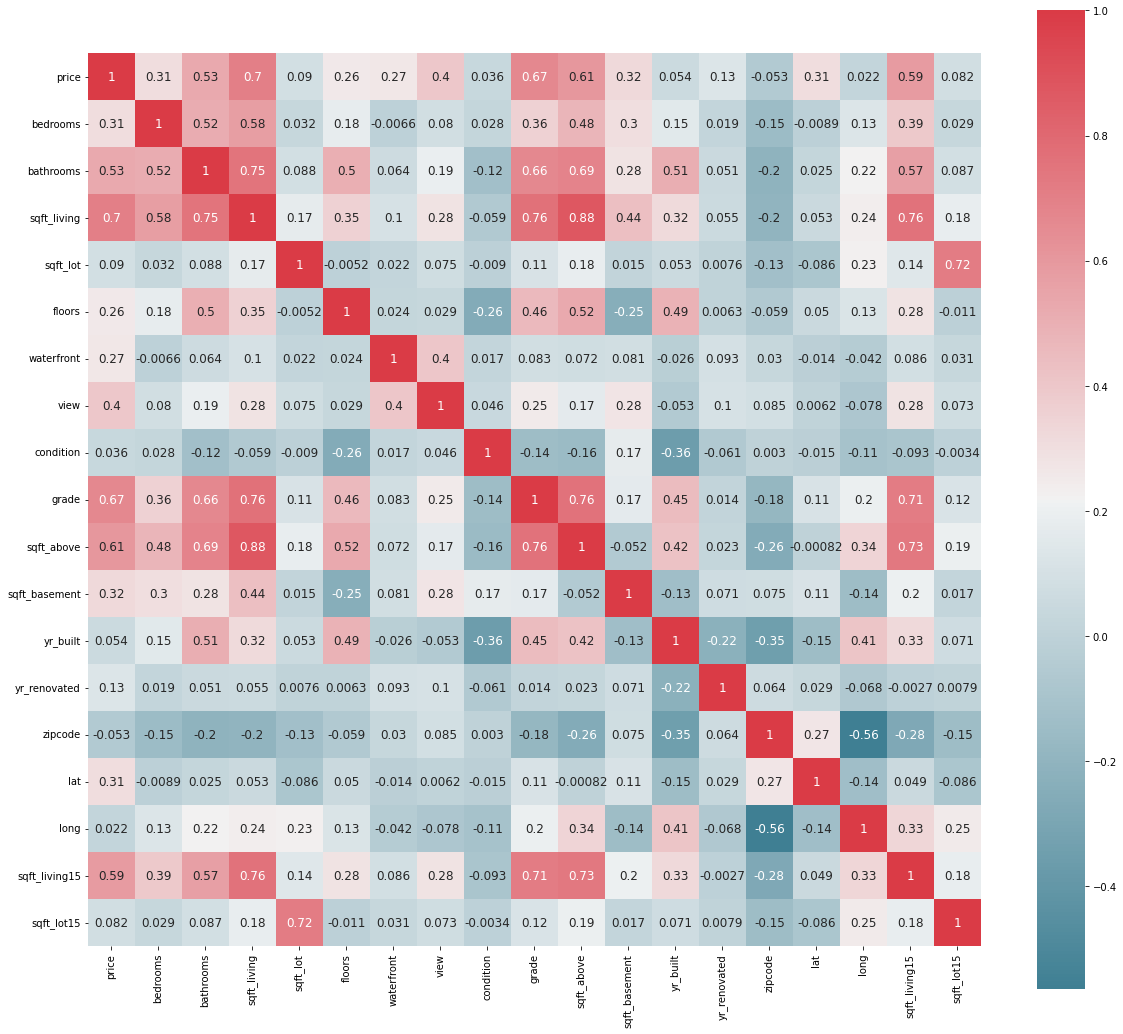

In [103]:
# Check the correlation between features
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)

#### Comments : 
- First we can see that the price is strongly correlated to bathrooms, sqft_livings, grade, sqft_above and sqft_living15 with a corelation of  0.5 and over. It's also quitegood correlated to bedrooms, floors, waterfront, view, sqft_basement, and lat with a correlation between 0.3 and 0.4.
- There's also a strong corelation between 
    - sqft_living and sqft_above 
    - sqft_lot and sqft_lot15 
    - sqft_living and sqft_living15 
    - sqft_above and sqft_living15 and grade and sqft living


In [104]:
# Comparing sqft features with each other
df.grade.value_counts()
surface_columns = ['floors','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                'sqft_living15', 'sqft_lot15']
df[surface_columns].head(10)

,floors,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.0,1180,5650,1180,0,1340,5650
1,2.0,2570,7242,2170,400,1690,7639
2,1.0,770,10000,770,0,2720,8062
3,1.0,1960,5000,1050,910,1360,5000
4,1.0,1680,8080,1680,0,1800,7503
5,1.0,5420,101930,3890,1530,4760,101930
6,2.0,1715,6819,1715,0,2238,6819
7,1.0,1060,9711,1060,0,1650,9711
8,1.0,1780,7470,1050,730,1780,8113
9,2.0,1890,6560,1890,0,2390,7570


- we can see that sqft_living15 is the sum of sqft_above and sqft_basement so we can remove them and keep just sqft_living15

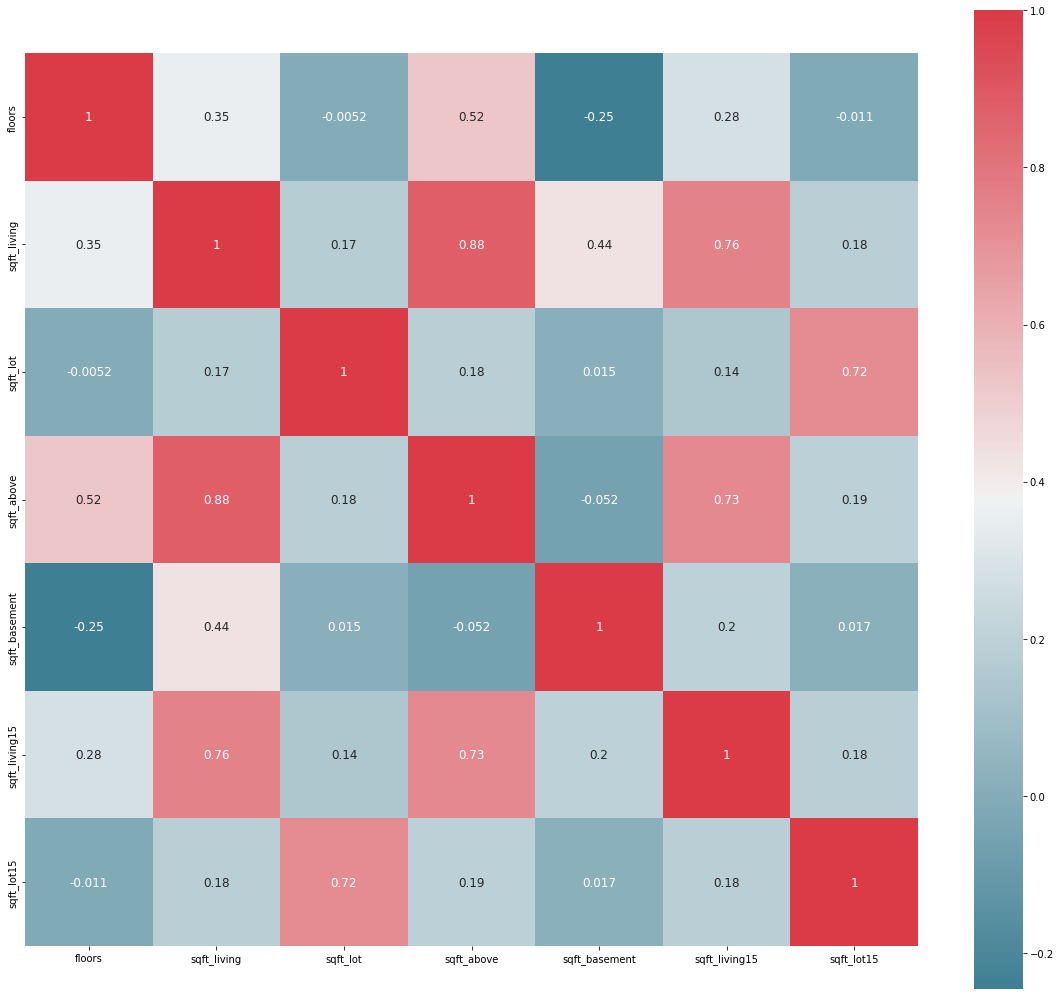

In [105]:
plot_correlation_map(df[surface_columns])

- sqft_living is strongly correlated to sqft_above and sqft_living15 
- sqft_lot to sqft_lot15
- sqft_above with sqft_living15

So the features that we'll keep are : bathrooms, grade, bedrooms, floors, view, sqft_living15, sqft_living, sqft_lot15, waterfront, view

['sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 
 'view', 'condition', 'price',  'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']

Text(0.5, 1.0, 'Price Distribution')

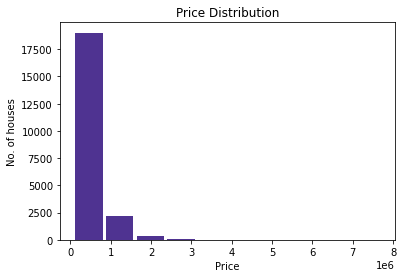

In [106]:
price_range = (df.price.min(), df.price.max())
price_bins = 10

plt.hist(df.price, price_bins, price_range,
        color = '#4f3391', histtype = 'bar', rwidth = 0.9)
plt.plot()
plt.xlabel('Price')
plt.ylabel('No. of houses')
plt.title('Price Distribution')

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

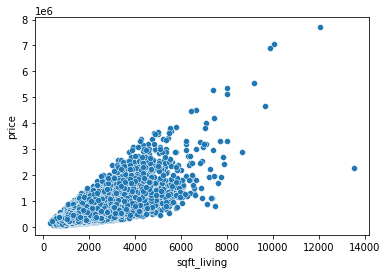

In [107]:
sns.scatterplot(data = df, x="sqft_living", y="price")

[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

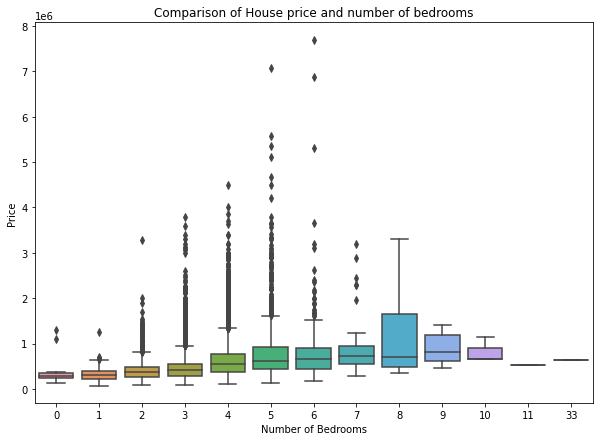

In [108]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data = df).set(
    xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

### 1. Simple linear regression

In [109]:
# regression price/sqft_living. dependent : price, independent : sqft_living 

X = df['sqft_living'].values.reshape(-1,1)
Y = df['price'].values.reshape(-1,1)

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)

LinearRegression()

In [111]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 1)
(6484, 1)
(15129, 1)
(6484, 1)


In [112]:
print(regressor.intercept_)
print(regressor.coef_)

[-40058.6152205]
[[278.8251385]]


In [113]:
y_test_pred = regressor.predict(X_test)

In [114]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error :  171653.38441401752
Mean Squared Error :  66630714602.50505
Root Mean Squared Error :  258129.25948544664


In [115]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('Train accuracy : ', metrics.r2_score(Y_train, y_train_pred))
print('Test accuracy : ', metrics.r2_score(Y_test, y_test_pred))


Train accuracy :  0.48566812555387384
Test accuracy :  0.509345329976364


- We see that the train and test accuracy are both quite low, we can say that the model is underfitting the data, it is too simple to fit the data form

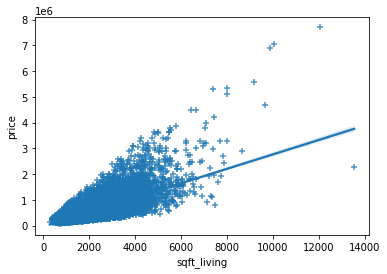

In [116]:
ax = sns.regplot(x="sqft_living", y="price", data=df , marker="+")

In [117]:
# line = pd.DataFrame({
#     'Y_test': Y_test.tolist(),
#     'y_pred': y_pred.tolist()
# })

# fig, ax = plt.subplots(figsize=(6, 4))
# p1 = sns.scatterplot(data=df, x='sqft_living', y='price', ax=ax)
# p2 = sns.lineplot(data=line, x='Y_test', y='y_pred', color='g', ax=ax)

### 2. Multi linear regression

In [118]:
X = df.drop(columns=['price'])
Y = df.price

In [119]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
print('Train accuracy : ', metrics.r2_score(Y_train, y_train_pred))
print('Test accuracy : ', metrics.r2_score(Y_test, y_test_pred))

Train accuracy :  0.6950920388519023
Test accuracy :  0.709739928577676


- Including all independent variables we can see that accuracy has considerably increased, so no more underfitting like for the linear model. The test accuracy is higher than the train one so there's no overfitting.

In [121]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, y_train_pred)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, y_test_pred)))
print('-'*100)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))))

In-sample MSE is      : 40959742414.07026
Out-of-sample MSE is  : 39417205543.99685
----------------------------------------------------------------------------------------------------
In-sample RMSE is     : 202385.13387615766
Out-of-sample RMSE is : 198537.66782149137


### 3. Polynomial linear regression

In [146]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)

# to transform data
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# to fit the model
lin_reg = LinearRegression()
poly_reg.fit(X_poly, Y_train)

----------------------------------------
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)


LinearRegression()

In [135]:
y_pred_pol = sc_y.inverse_transform(regressor_pol.predict(poly_reg.transform(sc_X.transform(X_test))))

NameError: name 'sc_y' is not defined

ValueError: x and y must be the same size

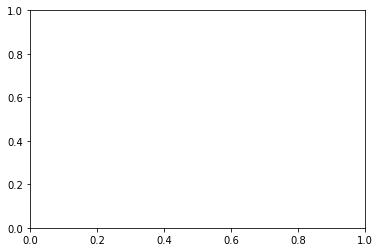

In [138]:
plt.scatter(X_poly, Y, color = 'blue')
# plt.plot(X_test, regressor_pol.predict(regressor_pol.fit_transform(X_test)), color = 'red')

# plt.title('Polynomial Regression')
# plt.xlabel('Temperature')
# plt.ylabel('Pressure')
  
plt.show()